# ALGORITMOS PARA EL VINO

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# FUNCIONES

## funcion para la matriz de confusion

In [42]:
def plot(y_val, y_pred, title):
    labels = unique_labels(y_train)
    column = [f'Predi {label}' for label in labels]
    indices = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_val, y_pred),
                         columns=column,index=indices)
    
    heatmap = sns.heatmap(table, annot=True, fmt='d', cmap='viridis')
    heatmap.set_title(title)
    return heatmap

## Funcion para calcular los resultados de los modelos

In [43]:
def resultadosModelo(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    classification_rep = classification_report(y_true, y_pred, zero_division=1)
    print("Precisión:", accuracy)
    print("Informe de Clasificación:\n")
    print(classification_rep)

In [44]:
datos = pd.read_csv("winequalityN.csv") 

In [45]:
datos

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [46]:
columnas_con_faltantes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

datos = datos.dropna(subset=columnas_con_faltantes)

<Axes: title={'center': 'Cantidad de datos de la calidad del vino'}, xlabel='quality'>

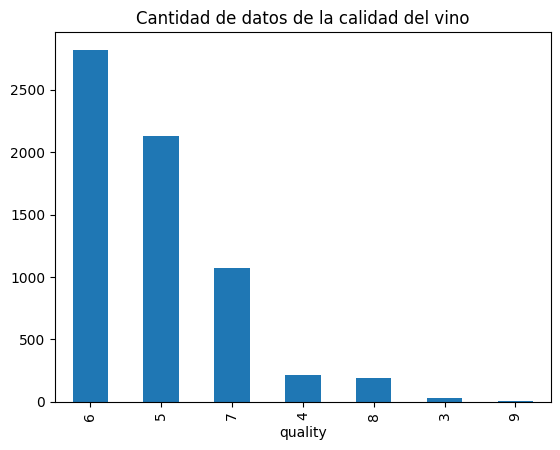

In [47]:
datos["quality"].value_counts().plot(kind='bar', title='Cantidad de datos de la calidad del vino')

In [48]:
datosn=datos[datos['quality'] != 9]

In [49]:
datosn=datosn[datosn['quality'] != 3]

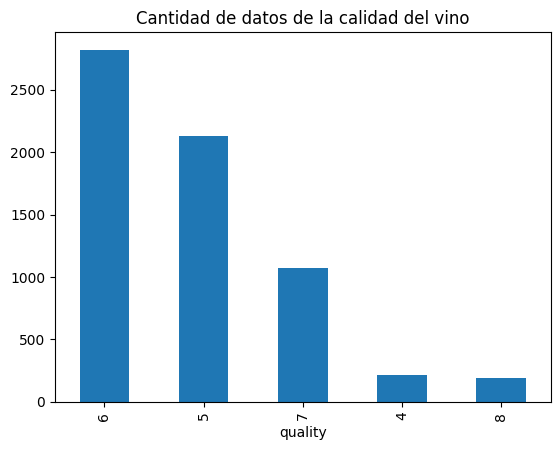

In [50]:
datosn["quality"].value_counts().plot(kind='bar', title='Cantidad de datos de la calidad del vino')
plt.savefig("cantidad de datos.eps",format='eps')

In [51]:
datosn.loc[datosn['type'] == 'red', 'type'] = 0
datosn.loc[datosn['type'] == 'white', 'type'] = 1

In [52]:
datosn

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,1,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,1,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,0,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,0,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,0,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,0,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


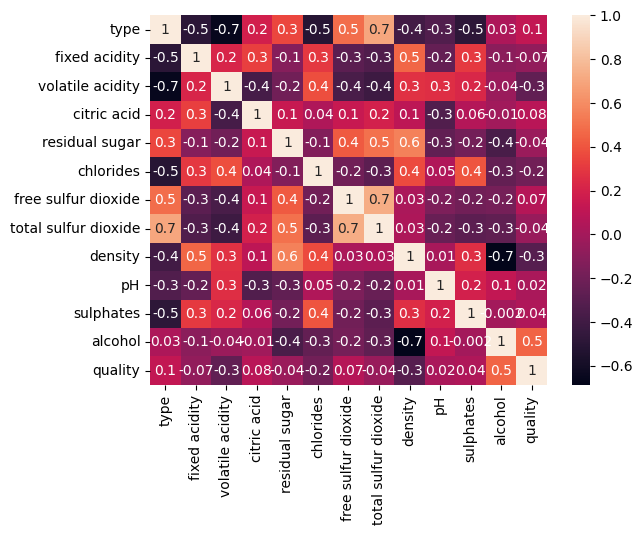

In [53]:
sns.heatmap(datosn.corr(),annot=True,fmt=".0g")
plt.savefig("correlacion.eps",format='eps')

In [54]:
X = datosn.drop('quality', axis=1)
y = datosn['quality']

In [55]:
mean = X.mean(axis=0)
std = X.std(axis=0)
data_normalized = (X - mean) / std

In [56]:
data_normalized

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.571557,-0.165718,-0.421997,0.283321,3.205832,-0.314764,0.838127,0.967272,2.101306,-1.359652,-0.545615,-1.419291
1,0.571557,-0.706192,-0.237969,0.145514,-0.808395,-0.2001,-0.950525,0.2908,-0.231743,0.510753,-0.277223,-0.832395
2,0.571557,0.683598,-0.360654,0.558935,0.3055,-0.171434,-0.02735,-0.332267,0.134879,0.261366,-0.612713,-0.329341
3,0.571557,-0.011297,-0.667367,0.007707,0.641771,0.057894,0.953523,1.252102,0.301526,-0.175062,-0.881105,-0.497025
4,0.571557,-0.011297,-0.667367,0.007707,0.641771,0.057894,0.953523,1.252102,0.301526,-0.175062,-0.881105,-0.497025
...,...,...,...,...,...,...,...,...,...,...,...,...
6491,-1.749334,-0.320139,1.724991,-1.645975,-0.745345,0.344554,-0.142747,-1.382578,0.604822,1.258915,1.937011,-0.832395
6492,-1.749334,-0.783403,1.602306,-1.645975,-0.724328,0.975207,0.088047,-1.275767,0.068221,1.445956,0.326659,0.006029
6494,-1.749334,-0.706192,1.050223,-1.301458,-0.661277,0.573883,-0.085049,-1.346975,0.348187,1.258915,1.467325,0.42524
6495,-1.749334,-1.015034,1.878347,-1.370362,-0.724328,0.545217,0.088047,-1.275767,0.258198,2.194118,1.198933,-0.245498


In [57]:
from sklearn.model_selection import train_test_split

### separacion de datos, entrenamiento (70%) y validacion (30%)

In [58]:
X_train, X_val, y_train, y_val = train_test_split(data_normalized, y, test_size=0.3, random_state=42)

# Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier

In [60]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}
# Create the grid search object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)
# Get the best model
best_model = grid_search.best_estimator_
# Make predictions on the validation set using the best model
y_pred_prueba = best_model.predict(X_val)
y_test_prueba = best_model.predict(X_train)
best_params = best_model.get_params
best_params

c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constra

<bound method BaseEstimator.get_params of RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)>

In [61]:
rf_classifier = RandomForestClassifier(n_estimators=100,max_features='sqrt',random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_val)

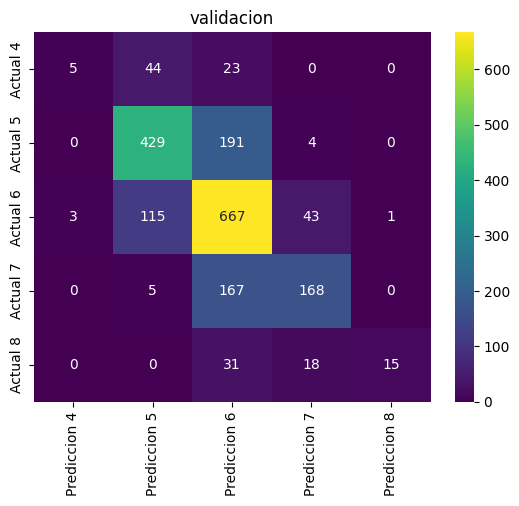

In [62]:
plot(y_val,y_pred_prueba,"validacion")
plt.savefig("validacionRF.eps",format='eps')

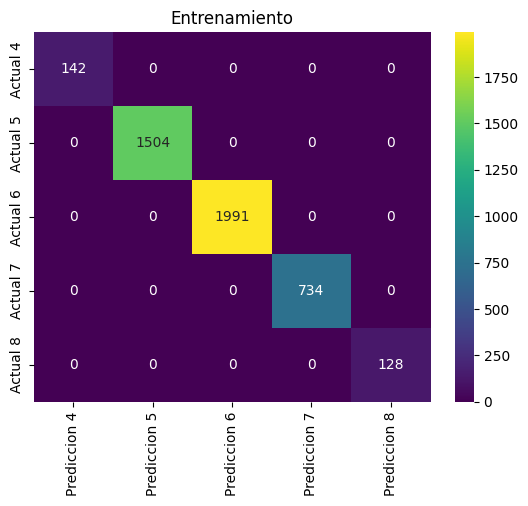

In [63]:
plot(y_train,y_test_prueba,"Entrenamiento")
plt.savefig("EntrenamientoRF.eps",format='eps')

In [64]:
resultadosModelo(y_val, y_pred_prueba)

Precisión: 0.6656298600311042
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.62      0.07      0.12        72
           5       0.72      0.69      0.71       624
           6       0.62      0.80      0.70       829
           7       0.72      0.49      0.59       340
           8       0.94      0.23      0.38        64

    accuracy                           0.67      1929
   macro avg       0.73      0.46      0.50      1929
weighted avg       0.68      0.67      0.65      1929



# K-MEANS

In [65]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1,leaf_size=80)
neigh.fit(X_train, y_train)
y_pred2 = neigh.predict(X_val)

In [66]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [1, 3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
    'leaf_size':[10,20,40,60,80,100,120]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba2 = best_model.predict(X_val)
y_test_prueba2 = best_model.predict(X_train)
best_params = grid_search.best_params_

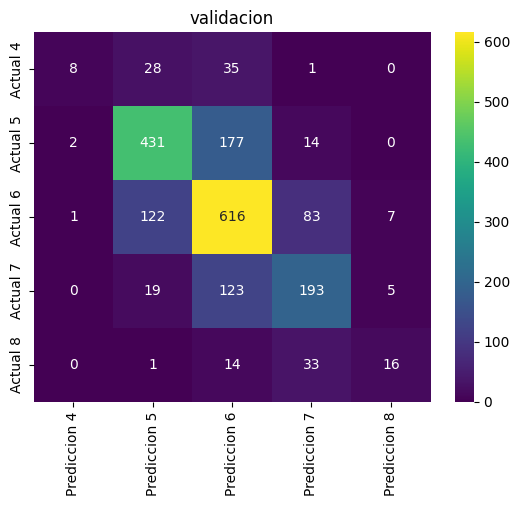

In [67]:
plot(y_val,y_pred_prueba2,"validacion")
plt.savefig("validacionKm.eps",format='eps')

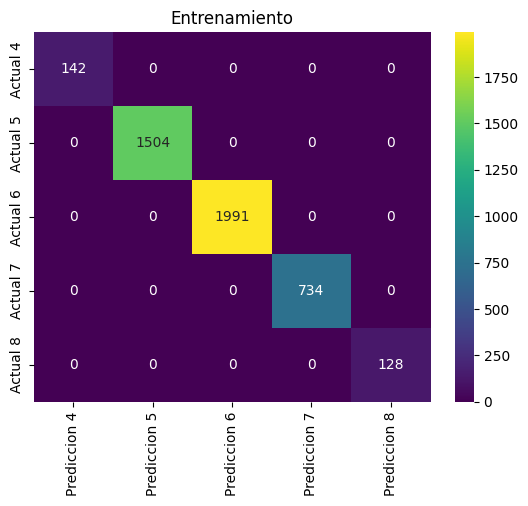

In [68]:
plot(y_train,y_test_prueba2,"Entrenamiento")
plt.savefig("EntrenamientoKm.eps",format='eps')

In [69]:
resultadosModelo(y_val, y_pred_prueba2)

Precisión: 0.6552617936754795
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.73      0.11      0.19        72
           5       0.72      0.69      0.70       624
           6       0.64      0.74      0.69       829
           7       0.60      0.57      0.58       340
           8       0.57      0.25      0.35        64

    accuracy                           0.66      1929
   macro avg       0.65      0.47      0.50      1929
weighted avg       0.66      0.66      0.64      1929



# Arboles de decision

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)
y_pred3 = classifier.predict(X_val)

In [72]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'splitter':['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba3 = best_model.predict(X_val)
y_test_prueba3 = best_model.predict(X_train)
best_params = grid_search.best_params_

c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_co

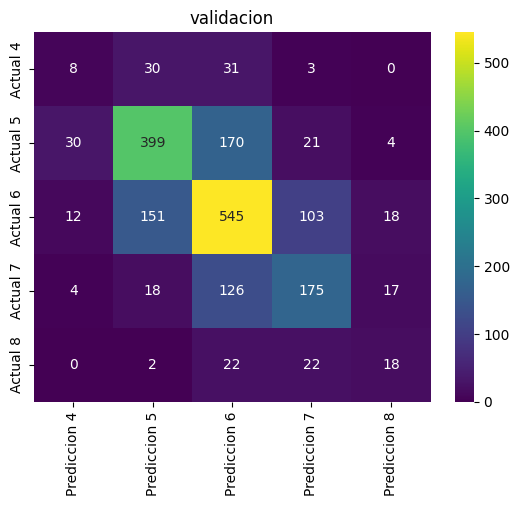

In [73]:
plot(y_val,y_pred_prueba3,"validacion")
plt.savefig("ArbolesDecisionVal.eps",format='eps')

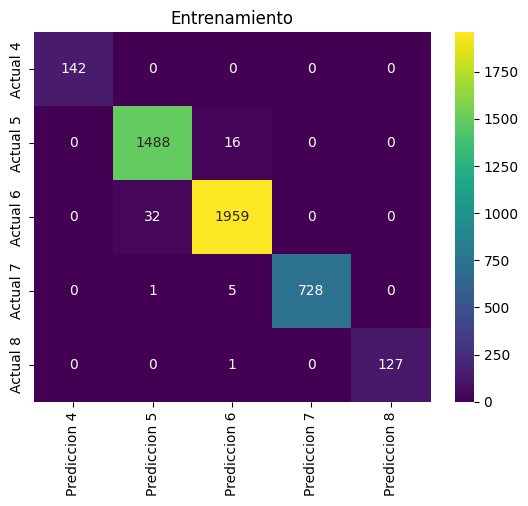

In [74]:
plot(y_train,y_test_prueba3,"Entrenamiento")
plt.savefig("ArbolesDecisionEnt.eps",format='eps')

In [75]:
resultadosModelo(y_val, y_pred_prueba3)

Precisión: 0.5935717988595127
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.15      0.11      0.13        72
           5       0.67      0.64      0.65       624
           6       0.61      0.66      0.63       829
           7       0.54      0.51      0.53       340
           8       0.32      0.28      0.30        64

    accuracy                           0.59      1929
   macro avg       0.46      0.44      0.45      1929
weighted avg       0.59      0.59      0.59      1929



# SVC (Support Vector Classifier)

In [76]:
from sklearn.svm import SVC

In [77]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred4 = svm_classifier.predict(X_val)

In [78]:
param_grid = {
    'C': [0.001, 0.01,0.1, 1, 10],  # Parámetro de regularización
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Tipo de kernel
    'gamma': ['scale', 'auto', 0.1, 1],
    'degree': [0.001,0.01,0.1,1,10]
}

# Create the grid search object
grid_search = GridSearchCV(estimator=SVC(),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model

best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred_prueba4 = best_model.predict(X_val)
y_test_prueba4 = best_model.predict(X_train)
best_params = grid_search.best_params_

c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1200 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\Erik\anaconda3\envs\Diplomado\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_con

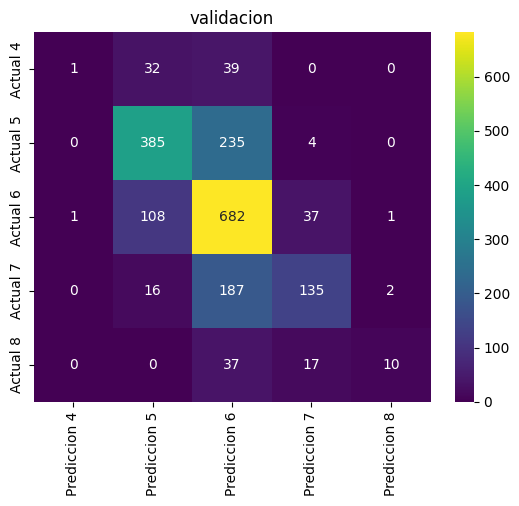

In [79]:
plot(y_val,y_pred_prueba4,"validacion")
plt.savefig("SVCVal.eps",format='eps')

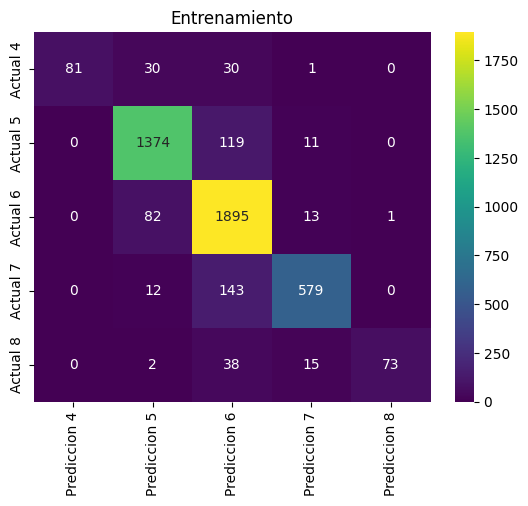

In [80]:
plot(y_train,y_test_prueba4,"Entrenamiento")
plt.savefig("SVCentrenamiento.eps",format='eps')

In [81]:
resultadosModelo(y_val, y_pred_prueba4)

Precisión: 0.6288232244686366
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.50      0.01      0.03        72
           5       0.71      0.62      0.66       624
           6       0.58      0.82      0.68       829
           7       0.70      0.40      0.51       340
           8       0.77      0.16      0.26        64

    accuracy                           0.63      1929
   macro avg       0.65      0.40      0.43      1929
weighted avg       0.65      0.63      0.60      1929



# MLP (Multilayer perceptron)

In [82]:
from sklearn.neural_network import MLPClassifier

In [83]:
mlp = MLPClassifier(hidden_layer_sizes=(120,240,120), max_iter=10000,activation='tanh')
mlp.fit(X_train, y_train)
y_pred5 = mlp.predict(X_val)
y_test5= mlp.predict(X_train)

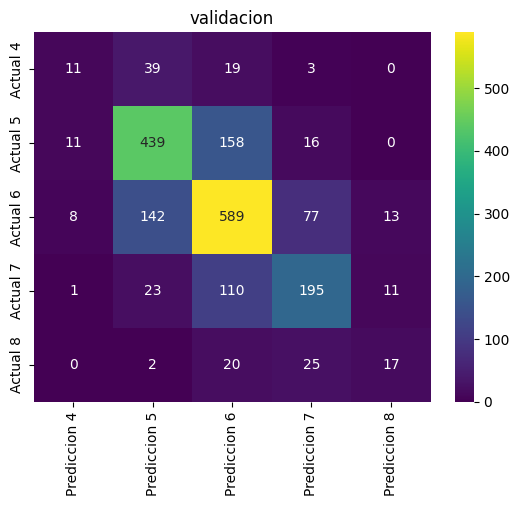

In [84]:
plot(y_val,y_pred5,"validacion")
plt.savefig("MLPVal.eps",format='eps')

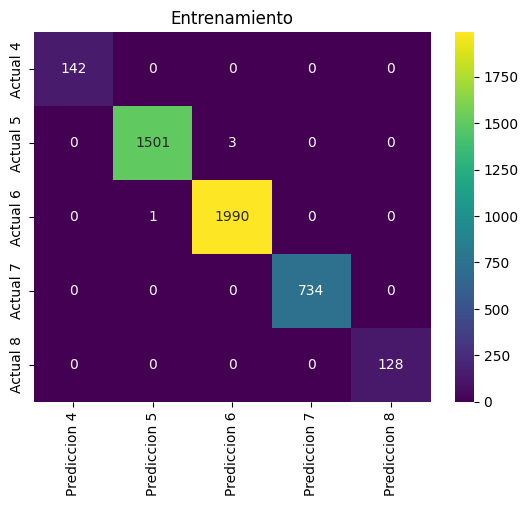

In [85]:
plot(y_train,y_test5,"Entrenamiento")
plt.savefig("MLPentrena.eps",format='eps')

In [86]:
resultadosModelo(y_val, y_pred5)

Precisión: 0.6485225505443235
Informe de Clasificación:

              precision    recall  f1-score   support

           4       0.35      0.15      0.21        72
           5       0.68      0.70      0.69       624
           6       0.66      0.71      0.68       829
           7       0.62      0.57      0.59       340
           8       0.41      0.27      0.32        64

    accuracy                           0.65      1929
   macro avg       0.54      0.48      0.50      1929
weighted avg       0.64      0.65      0.64      1929



# TensorFlow

In [107]:
y_train_array = y_train.values
y_val_array = y_val.values
# Ensure the values are integers, as to_categorical expects integers
y_train_array = y_train_array.astype(int)
y_val_array = y_val_array.astype(int)
# Subtract 1 from y_train_array because to_categorical assumes that the classes start from 0
y_train_array = y_train_array - 4
y_val_array = y_val_array - 4
# Convert to one-hot encoding
y_train2 = keras.utils.to_categorical(y_train_array, num_classes=5)
y_val2 = keras.utils.to_categorical(y_val_array, num_classes=5)

In [108]:
from tensorflow import keras

model = tf.keras.models.Sequential([
  
  keras.layers.Dense(120, activation='selu', input_shape=(4,), kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(240, activation='selu', kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(120, activation='selu', kernel_regularizer=keras.regularizers.l2(0.001)),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(5, activation='softmax')
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [109]:
history = model.fit(X_train, y_train2, batch_size=32, epochs=1000, verbose=2, 
                    shuffle=True, validation_data=(X_val, y_val2))


print(history.history.keys())

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

61/61 [==============================] - 0s 3ms/step


<Axes: >

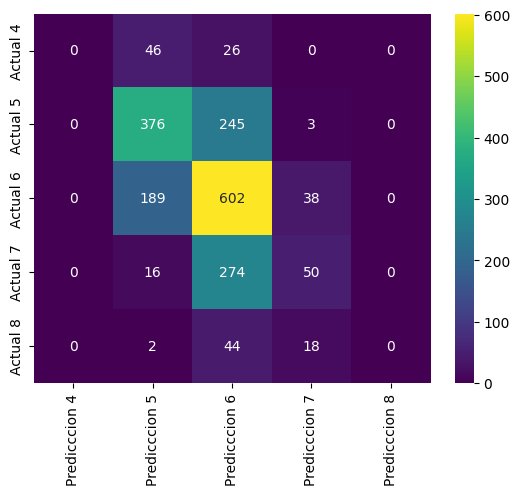

In [ ]:
q = model.predict(X_val)
q = np.argmax(q, axis = 1)
plot(y_val_array,q)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

X, y = make_blobs(n_samples=10000, n_features=10, centers=100,
                  random_state=0)

clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
                             random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

clf = RandomForestClassifier(n_estimators=10, max_depth=None,
                             min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean()

clf = ExtraTreesClassifier(n_estimators=10, max_depth=None,
                           min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
scores.mean() > 0.999
True

True

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_iris
from sklearn.ensemble import (
    AdaBoostClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration

# Load data
iris = load_iris()

plot_idx = 1

models = [
    DecisionTreeClassifier(max_depth=None),
    RandomForestClassifier(n_estimators=n_estimators),
    ExtraTreesClassifier(n_estimators=n_estimators),
    AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=n_estimators),
]

for pair in ([0, 1], [0, 2], [2, 3]):
    for model in models:
        # We only take the two corresponding features

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std

        # Train
        model.fit(X, y)

        scores = model.score(X, y)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][: -len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details + " with features", pair, "has a score of", scores)

        plt.subplot(3, 4, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title, fontsize=9)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifiers
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser),
        )
        Z_points_coarser = model.predict(
            np.c_[xx_coarser.ravel(), yy_coarser.ravel()]
        ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(
            xx_coarser,
            yy_coarser,
            s=15,
            c=Z_points_coarser,
            cmap=cmap,
            edgecolors="none",
        )

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(
            X[:, 0],
            X[:, 1],
            c=y,
            cmap=ListedColormap(["r", "y", "b"]),
            edgecolor="k",
            s=20,
        )
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset", fontsize=12)
plt.axis("tight")
plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)
plt.show()

KeyError: "None of [Index([3344, 3488, 4469, 1580, 5613, 2851, 1301, 2755, 1609, 2720,\n       ...\n        922, 4026,  748,  153, 5876,  866, 2790,   74, 6320,  338],\n      dtype='int32', length=6428)] are in the [columns]"